In [1]:
import jax # type: ignore
from jax import numpy as jnp # type: ignore
import csv
import os
import scienceplots # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib_inline # type: ignore
plt.style.use(['science', 'ieee'])
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
model_name = 'lgssm'
parameter_name = 'dynamics_covariance'

### Read baseline if LGSSM

In [3]:
bsln_filename = os.path.join('/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/', 'output', f"baseline.csv")

if model_name == 'lgssm':
    baseline_error = 0.0
    with open(bsln_filename, mode='r') as file:
        csvFile = csv.reader(file)
        for line_number, line in enumerate(csvFile):
            baseline_error += float(line[0])
    baseline_error = baseline_error / (line_number + 1)

### Read csv

In [4]:
import csv
bpf_errors = []
bpf_num_sims = []
bpf_success = []
taf_errors = []
taf_num_sims = []
taf_success = []
snl_errors = []
snl_num_sims = []
snl_success = []
file_name = os.path.join('/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/output', f"output_{model_name}.csv")
with open(file_name, mode='r') as file:
    csvFile = csv.reader(file)
    for line_number, line in enumerate(csvFile):
        if line_number == 0:
            continue
        else:
            bpf_errors.append(float(line[0]))
            bpf_num_sims.append(float(line[1]))
            bpf_success.append(float(line[2]))
            taf_errors.append(float(line[3]))
            taf_num_sims.append(float(line[4]))
            taf_success.append(float(line[5]))
            snl_errors.append(float(line[6]))
            snl_num_sims.append(float(line[7]))
            snl_success.append(float(line[8]))
    bpf_errors = jnp.array(bpf_errors)
    bpf_num_sims = jnp.array(bpf_num_sims)
    bpf_success = jnp.array(bpf_success)

    taf_errors = jnp.array(taf_errors)
    taf_num_sims = jnp.array(taf_num_sims)
    taf_success = jnp.array(taf_success)

    snl_errors = jnp.array(snl_errors)
    snl_num_sims = jnp.array(snl_num_sims)
    snl_success = jnp.array(snl_success)

    bpf_errors = bpf_errors[jnp.argsort(bpf_num_sims)]
    bpf_num_sims = bpf_num_sims[jnp.argsort(bpf_num_sims)]
    bpf_success = bpf_success[jnp.argsort(bpf_num_sims)]

    taf_errors = taf_errors[jnp.argsort(taf_num_sims)]
    taf_num_sims = taf_num_sims[jnp.argsort(taf_num_sims)]
    taf_success = taf_success[jnp.argsort(taf_num_sims)]

    snl_errors = snl_errors[jnp.argsort(snl_num_sims)]
    snl_num_sims = snl_num_sims[jnp.argsort(snl_num_sims)]
    snl_success = snl_success[jnp.argsort(snl_num_sims)]

### Plot and savefig

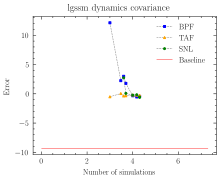

In [5]:
figname = f'{model_name}_{parameter_name}'
plt.plot(bpf_num_sims-3, bpf_errors, linewidth=0.5, color='gray', markerfacecolor='blue', markeredgecolor='blue', marker='s', markersize=2.0, linestyle='--', label='BPF')
plt.plot(taf_num_sims, taf_errors, linewidth=0.5, color='gray', markerfacecolor='orange', markeredgecolor='orange', marker='^', markersize=2.0, linestyle='--', label='TAF')
plt.plot(snl_num_sims, snl_errors, linewidth=0.5, color='gray', markerfacecolor='green', markeredgecolor='green', marker='o', markersize=2.0, linestyle='--', label='SNL')

if model_name == 'lgssm':
    plt.hlines(baseline_error, jnp.array([0.0]), jnp.max(jnp.array([bpf_num_sims, taf_num_sims])), color='red', linewidth=0.4, label='Baseline')
plt.xlabel('Number of simulations')
# plt.xticks(jnp.linspace(0, 7, 8), [f'$10^{i}$' for i in range(8)])
plt.ylabel('Error')
plt.title(figname)
plt.legend()
plt.savefig(os.path.join('/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm/figures', f'{figname}.eps'))
plt.show()

